In [84]:
# training set - data with labels for training (90% of data)
# validation set - used to adjust hyperparameters (10% of data)
# test set

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [85]:
np.random.seed(0)

In [86]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # (60000, 28, 28) and (10000, 28, 28)

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]
assert X_train.shape[1:] == (28, 28)
assert X_test.shape[1:] == (28, 28)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


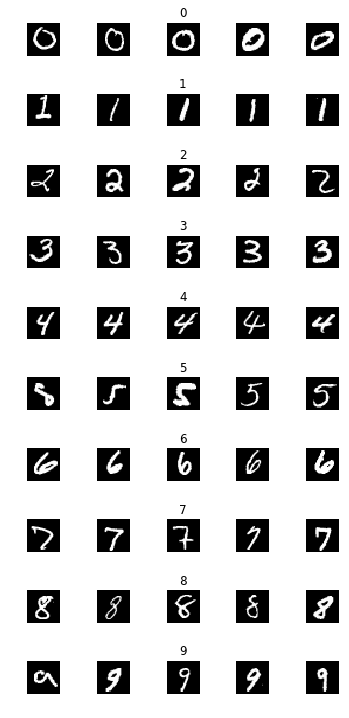

In [88]:
num_of_samples = []

cols = 5
num_classes = 10 # numbers 0 to 9

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')

        if i == 2:
            axs[j][i].set_title(j)
            num_of_samples.append(len(x_selected))

Text(0,0.5,'Number of Images')

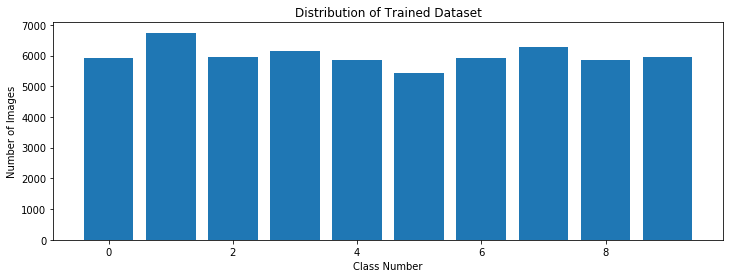

In [89]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of Trained Dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")

In [90]:
# one hot encoding for labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(len(y_test))

10000


In [91]:
X_train = X_train / 255
X_test = X_test / 255

In [92]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape, X_test.shape)

((60000, 784), (10000, 784))


In [93]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [94]:
model = create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_9 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
history = model.fit(X_train, y_train, validation_split=0.1, verbose=1, batch_size=200, epochs=10, shuffle='true')

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 15us/step - loss: 1.8998 - accuracy: 0.3226 - val_loss: 1.7432 - val_accuracy: 0.3782
Epoch 2/10
54000/54000 [==============================] - 1s 12us/step - loss: 1.7375 - accuracy: 0.3818 - val_loss: 1.7108 - val_accuracy: 0.3892
Epoch 3/10
54000/54000 [==============================] - 1s 11us/step - loss: 1.7025 - accuracy: 0.3935 - val_loss: 1.6922 - val_accuracy: 0.4030
Epoch 4/10
54000/54000 [==============================] - 1s 12us/step - loss: 1.6845 - accuracy: 0.4001 - val_loss: 1.6843 - val_accuracy: 0.4008
Epoch 5/10
54000/54000 [==============================] - 1s 12us/step - loss: 1.6709 - accuracy: 0.4051 - val_loss: 1.6658 - val_accuracy: 0.4058
Epoch 6/10
54000/54000 [==============================] - 1s 12us/step - loss: 1.6626 - accuracy: 0.4059 - val_loss: 1.6678 - val_accuracy: 0.4052
Epoch 7/10
54000/54000 [==============================] - 1s 12us/ste

Text(0.5,0,'epoch')

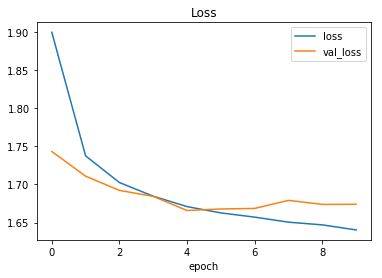

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5,0,'epoch')

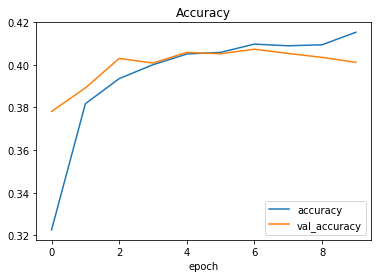

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')


In [98]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

<type 'list'>
('Test Score:', 1.7023782205581666)
('Test Accuracy:', 0.3953999876976013)


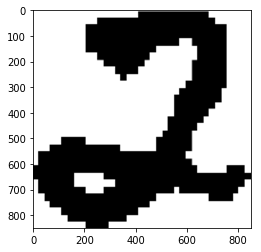

In [99]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'

response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0 118 255 255 255 255
  255 255 255 255 222   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   2   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 254 254
  254   0 236 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0  33 255 255 255 255 255 255 255  33   0   0
    0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0  21 255 255 255 255 255  21   0   0   0
    0   0 215 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 255 255 137   0   0   0   0
    0   0 235 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   

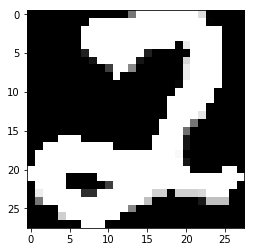

In [100]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)

plt.imshow(image, cmap=plt.get_cmap('gray'))
print(image)


In [101]:
image = image / 255
image = image.reshape(1, 784)
print(image)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
  0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
  1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
  0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
  0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 

In [102]:
prediction = model.predict_classes(image)
print("Prediction", str(prediction))

('Prediction', '[2]')
